# Q.4 Regression - Medical Cost Personal Datasets

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [7]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

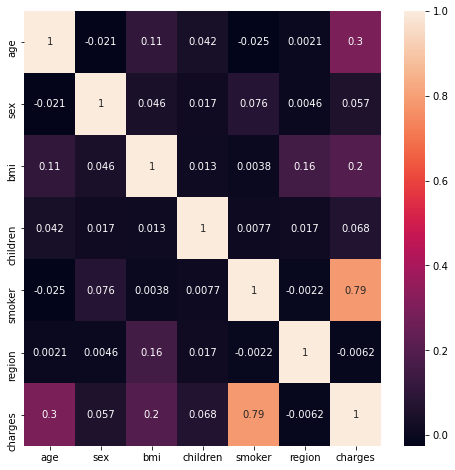

In [43]:
CorrMat = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(CorrMat, annot=True)

##  It can be seen that none of the columns are highly correlated with output column. So linear models might not perform well.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

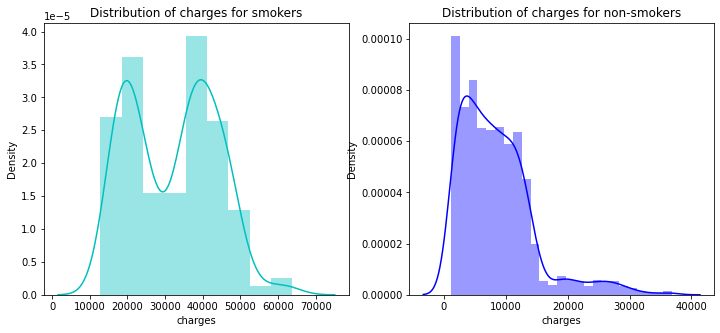

In [9]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. Going to check it.

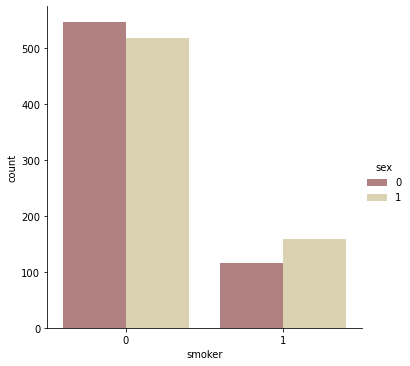

In [10]:

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

### women are coded with the symbol " 1 "and men - "0"

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

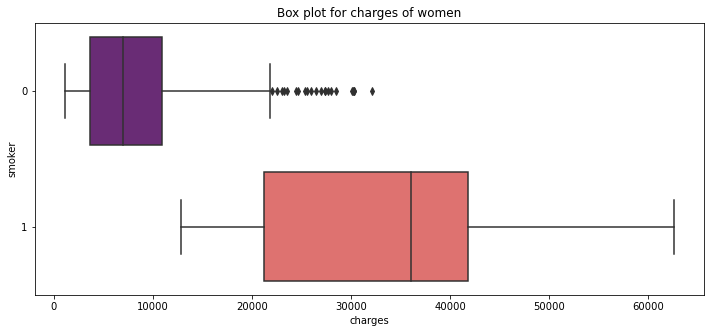

In [12]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

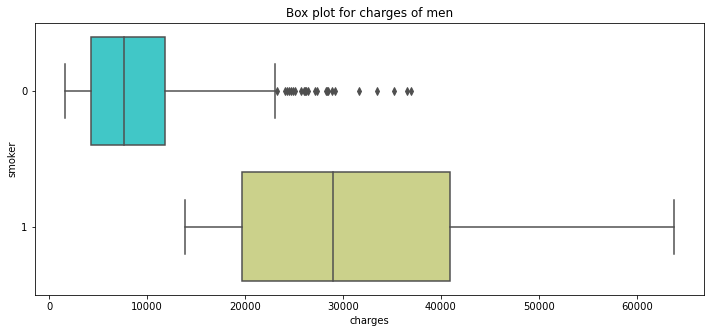

In [13]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

Now let's pay attention to the age of the patients.  First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

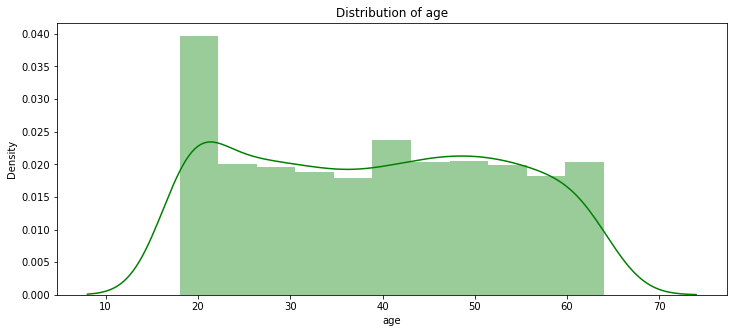

In [14]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X = data.drop(['charges'], axis = 1)
y = data.charges

In [39]:
def train_model_helper(model, X, y, test_size=0.25, random_state=0, plot_confusion_matrix = False, Model_Name=''):
    
    if Model_Name=='':
        Model_Name = model.__class__.__name__
    print(f"Model name: {Model_Name} \nTest Size:{test_size}")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE:', mean_squared_error(y_test, y_pred, squared = False))
    print('R2 Score:', r2)

    
    return r2, rmse

In [35]:
models_R2 = {}
models_RMSE = {}
data_ = [data]
data_names = ['data']
Test_Data_Sizes = [0.15, 0.20, 0.25]

In [36]:
def train_model(model_name, model, plot_confusion_matrix = False, test_data_size=[0.25]):
    models_R2[model_name] = []
    models_RMSE[model_name] = []
    
    for size in test_data_size:
        for index, curr_data in enumerate(data_):
            #splitting data in input and output
            X = curr_data.iloc[:, :-1].values
            y = curr_data.iloc[:, -1].values

            #training the model for given data
            # print(f'\n\nFor {data_names[index]}: \n')
            r2, rmse = train_model_helper(model, X, y, Model_Name=model_name, test_size=size)

            #appending the accuracy to dictionary
            models_R2[model_name].append(r2)
            models_RMSE[model_name].append(rmse)
            print(f'\n\n')
    

In [37]:
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(kernel = 'rbf'),
    'Decision_Tree':DecisionTreeRegressor(random_state = 0),
    'Random_Forest':RandomForestRegressor(n_estimators = 10, random_state = 0),
    'XG_Boost':xgb.XGBRegressor(n_estimators=10, random_state=0)
}

In [40]:
for name,model in models.items():
    train_model(name, model, test_data_size=Test_Data_Sizes)

Model name: Linear Regression 
Test Size:0.15
RMSE: 5893.741909763806
R2 Score: 0.7915641662953337



Model name: Linear Regression 
Test Size:0.2
RMSE: 5643.219748880902
R2 Score: 0.7998747145449959



Model name: Linear Regression 
Test Size:0.25
RMSE: 5663.358417062194
R2 Score: 0.7962732059725786



Model name: SVR 
Test Size:0.15
RMSE: 13716.752651662473
R2 Score: -0.12899695446362092



Model name: SVR 
Test Size:0.2
RMSE: 13234.043046769993
R2 Score: -0.10060916755090288



Model name: SVR 
Test Size:0.25
RMSE: 13121.83144163975
R2 Score: -0.09367671249925591



Model name: Decision_Tree 
Test Size:0.15
RMSE: 8009.398089674454
R2 Score: 0.6150627710850973



Model name: Decision_Tree 
Test Size:0.2
RMSE: 7655.113834166956
R2 Score: 0.631742715457764



Model name: Decision_Tree 
Test Size:0.25
RMSE: 7199.296172918886
R2 Score: 0.670784604552852



Model name: Random_Forest 
Test Size:0.15
RMSE: 5141.596522454526
R2 Score: 0.8413697012294904



Model name: Random_Forest 
Test Siz

In [44]:
models_R2

{'Linear Regression': [0.7915641662953337,
  0.7998747145449959,
  0.7962732059725786],
 'SVR': [-0.12899695446362092, -0.10060916755090288, -0.09367671249925591],
 'Decision_Tree': [0.6150627710850973, 0.631742715457764, 0.670784604552852],
 'Random_Forest': [0.8413697012294904, 0.8731720642904041, 0.8591206383951127],
 'XG_Boost': [0.8783385650031375, 0.8835243659813272, 0.8886531793401822]}

In [45]:
results_R2 = pd.DataFrame(models_R2)
results_R2 = results_R2.transpose()
results_R2.columns = ['test_15', 'test_20', 'test_25']
results_R2

,test_15,test_20,test_25
Linear Regression,0.791564,0.799875,0.796273
SVR,-0.128997,-0.100609,-0.093677
Decision_Tree,0.615063,0.631743,0.670785
Random_Forest,0.841370,0.873172,0.859121
XG_Boost,0.878339,0.883524,0.888653


In [46]:
results_RMSE = pd.DataFrame(models_RMSE)
results_RMSE = results_RMSE.transpose()
results_RMSE.columns = ['test_15', 'test_20', 'test_25']
results_RMSE

,test_15,test_20,test_25
Linear Regression,3.473619e+07,3.184593e+07,3.207363e+07
SVR,1.881493e+08,1.751399e+08,1.721825e+08
Decision_Tree,6.415046e+07,5.860077e+07,5.182987e+07
Random_Forest,2.643601e+07,2.018212e+07,2.217927e+07
XG_Boost,2.027509e+07,1.853476e+07,1.752983e+07


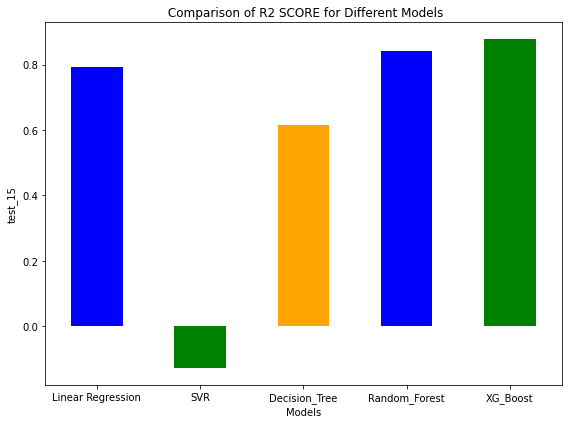

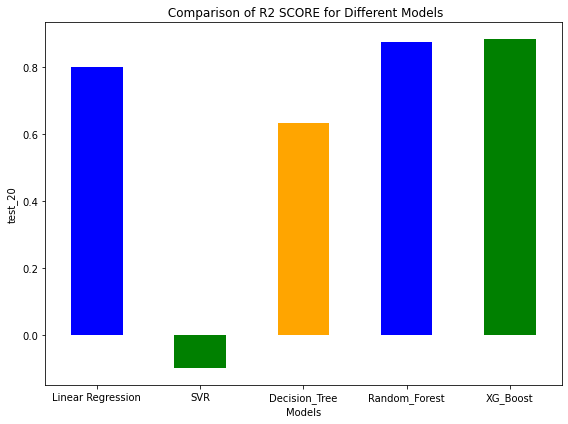

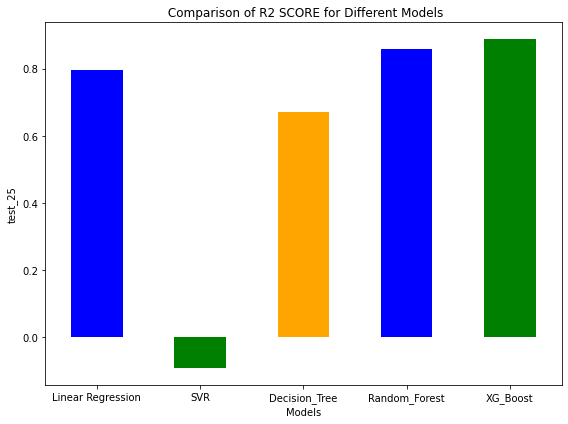

In [49]:
for col in results_R2.columns:
    plt.figure(figsize=(8, 6))
    results_R2[col].plot(kind='bar', color=['blue', 'green', 'orange'])
    plt.xlabel('Models')
    plt.ylabel(col)
    plt.title(f' Comparison of R2 SCORE for Different Models')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

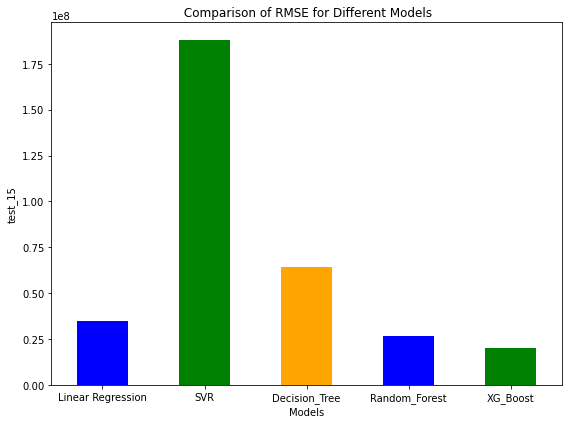

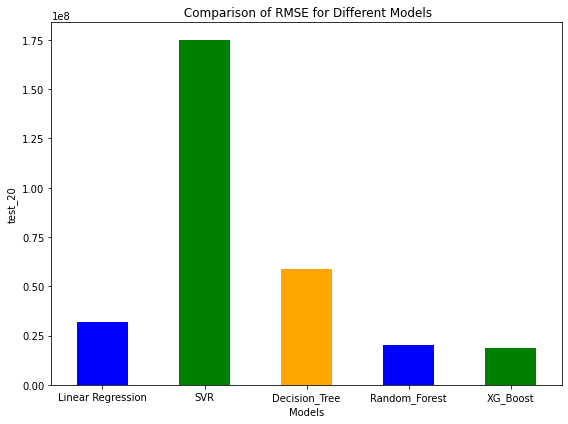

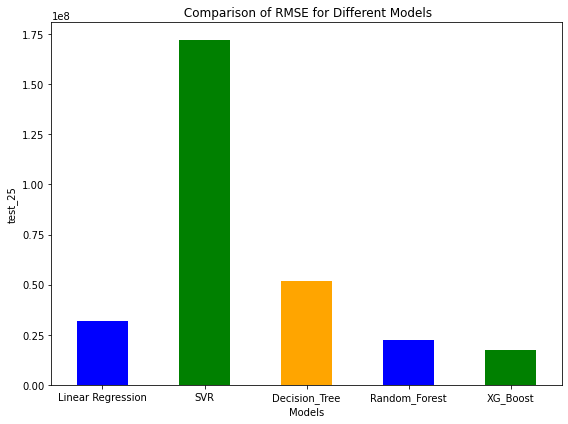

In [48]:
for col in results_RMSE.columns:
    plt.figure(figsize=(8, 6))
    results_RMSE[col].plot(kind='bar', color=['blue', 'green', 'orange'])
    plt.xlabel('Models')
    plt.ylabel(col)
    plt.title(f' Comparison of RMSE for Different Models')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

### SVR is Performing worst while XG_Boost is best
### XG_Boost can be further hypertuned for better performance